In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%matplotlib notebook

In [2]:
def pickle_savefig(fig,figname):
    matplotlib_name = 'figs/' + figname + '_plt.p'
    with open(matplotlib_name,'wb') as f:
        pickle.dump(fig,f)
    fig.savefig('figs/' + figname +'.png')

In [6]:
def read_pickle_fig(figname):
    with open('figs/'+figname +'_plt.p', 'rb') as f:
        fig = pickle.load(f)
    return fig

<IPython.core.display.Javascript object>


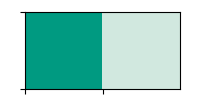

In [5]:
def nmbu_palette(color_path='C:\\Users\\vegar\\Dropbox\\Master\\thesis.git\\data'):
    """
    Createes list with rbg of nmbu colors. Can be fed to seaborn.set_palette()
    :return:
    """
    color_path += '\\nmbu_palette.csv'
    colorframe = pd.read_csv(color_path)
    colorframe = colorframe[['r', 'g', 'b']].values
    palette = [colorframe[k, :] for k in range(colorframe.shape[0])]
    return palette
palette = nmbu_palette()
line_colors = [palette[k] for k in [0,8]]
bar_colors = [palette[k] for k in [0,1]]
sns.palplot(bar_colors)

In [7]:
def pickle_savefig(fig,figname):
    matplotlib_name = 'figs/' + figname + '_plt.p'
    with open(matplotlib_name,'wb') as f:
        pickle.dump(fig,f)
    fig.savefig('figs/' + figname +'.png')

# Cost plots
Plots for illustrating how the agent is penalised

## Violate voltage

<IPython.core.display.Javascript object>


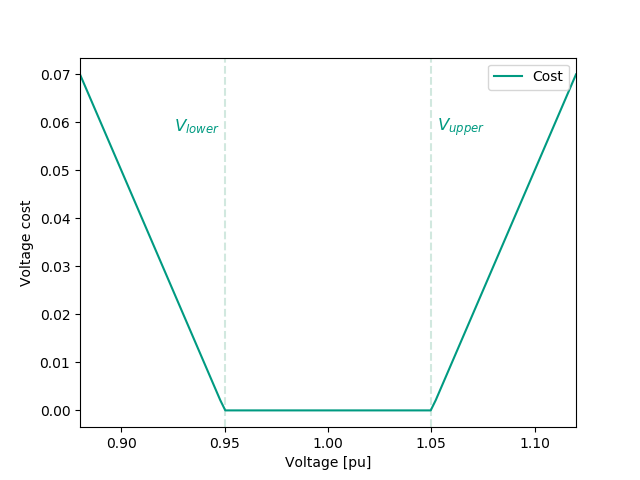

In [96]:
sns.set_palette(palette)
tol = 0.05
v_max = 1 + tol
v_min = 1 - tol
v = np.linspace(0.88,1.12,100)
cost = np.zeros_like(v)
cost[v < v_min] = v_min - v[v < v_min]
cost[v > v_max] = v[v > v_max] - v_max
df = pd.DataFrame(cost, columns=['Cost'])
df['Voltage [pu]'] = v


fig,ax = plt.subplots()
ax.axvline(v_min,linestyle='--', color=palette[1])
ax.axvline(v_max,linestyle='--', color=palette[1])
ax.set_ylabel('Voltage cost')
ax.text(0.72, 0.8, '$V_{upper}$',transform=ax.transAxes, fontsize=12,color=palette[0])
ax.text(0.19, 0.8, '$V_{lower}$',transform=ax.transAxes, fontsize=12,color=palette[0])


df.plot(x='Voltage [pu]', ax=ax)




In [97]:
#fig.savefig('figs/voltage_cost.png')

## Current cost

<IPython.core.display.Javascript object>


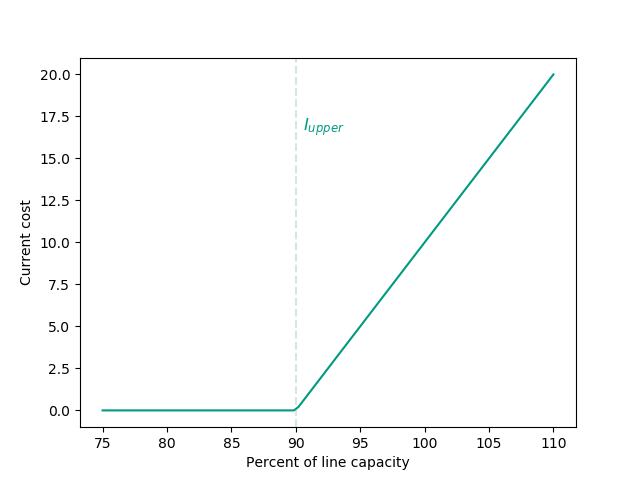

In [77]:
i_max = 90
i = np.linspace(75,110,100)
cost = np.zeros_like(i)
cost[i > i_max] = i[i > i_max] - i_max
df = pd.DataFrame(cost, columns=['Cost'])
df['Current'] = i


fig,ax = plt.subplots()
ax.axvline(i_max,linestyle='--',color=palette[1])
ax.set_ylabel('Current cost')
ax.set_xlabel('Percent of line capacity')
ax.text(0.45, 0.8, '$I_{upper}$',transform=ax.transAxes, fontsize=12,color=palette[0])
ax.plot(i,cost)

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.set_xticks([0,i_max])
#ax.set_yticks([0,0.2])

#df.plot(x='Current', ax=ax, color='black')




In [78]:
#fig.savefig('figs/current_cost.png')

## Reward shaping
First RL tasks where agent should meet demand in 2-bus system

<IPython.core.display.Javascript object>


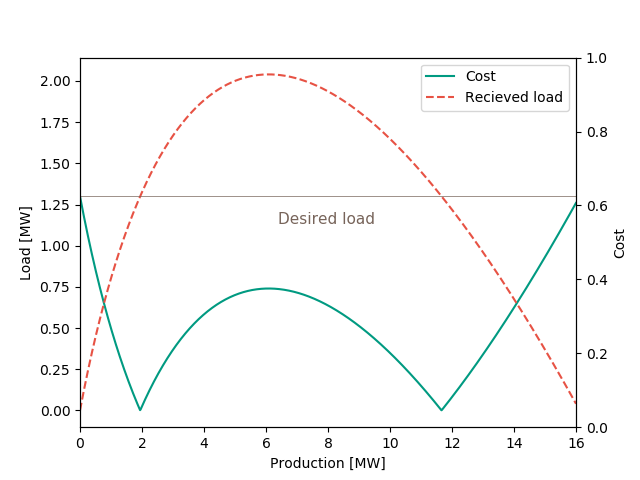

Text(0, 0.5, 'Cost')

In [83]:
sns.set_palette(line_colors)
data_path = 'C:\\Users\\vegar\\Dropbox\\Master\\thesis.git\\data\\two_bus_load_balancing.csv'
df = pd.read_csv(data_path)
data = df[['prod','cost1','busload']]
data /= 1000
data = data.rename(columns={'prod':'Production [MW]','cost1':'Cost','busload':'Recieved load'})

fig, ax = plt.subplots()
data.plot(x='Production [MW]',ax=ax, style=['-','--'])
ax.axhline(1.3,linestyle='-', color=palette[-4], linewidth=0.5)
ax.set_ylabel('Load [MW]')
ax.text(0.4, 0.55, 'Desired load',transform=ax.transAxes, fontsize=11, color=palette[-4])
ax2 = plt.twinx()
ax2.set_ylabel('Cost')


In [84]:
#pickle_savefig(fig,'twobus_load_balance')

# Find plotting style
I will use the nmbu color palette throughout the thesis.

<IPython.core.display.Javascript object>


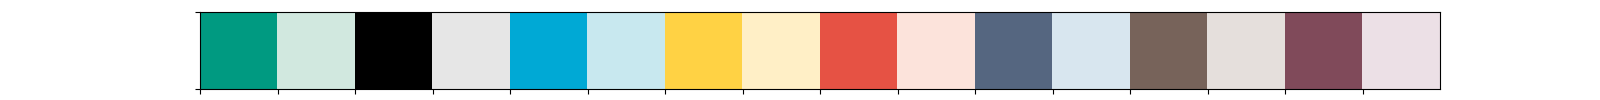

In [11]:
palette = nmbu_palette()
sns.palplot(palette)

<IPython.core.display.Javascript object>


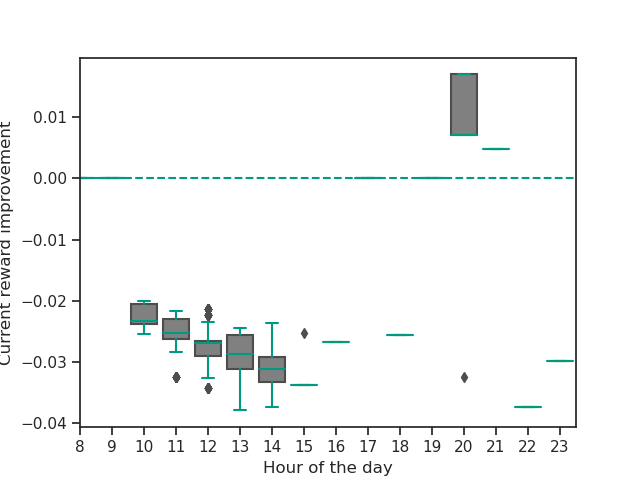

In [42]:
fig = read_pickle_fig('config1_improvement_current')
ax = fig.axes[0]

<IPython.core.display.Javascript object>


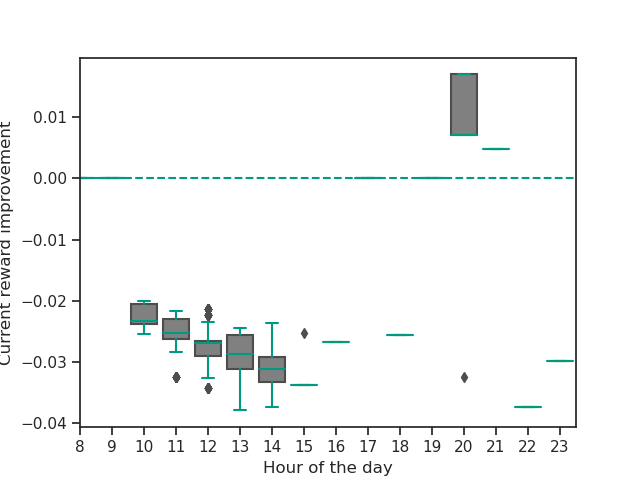

In [45]:
for line in ax.lines:
    line.set_color(palette[0])
fig

## Discussion plot - energy imbalance

In [24]:
df = pd.DataFrame()
df['Time step'] = [1,2,3]
df['A'] = [2,1,3]
df['B'] = [2,3,5]

<IPython.core.display.Javascript object>


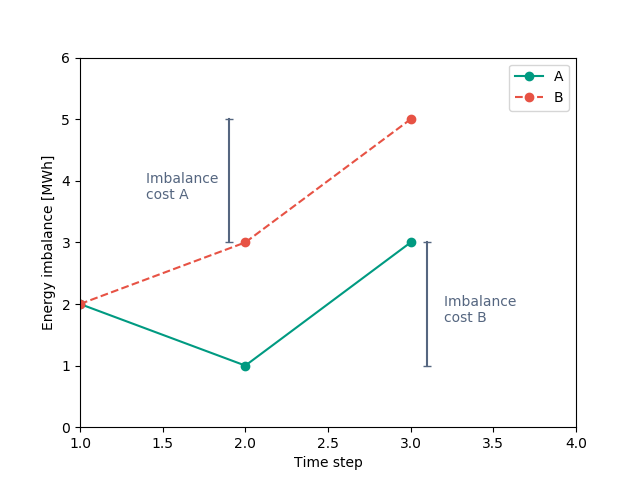

Text(3.2, 1.7, 'Imbalance \ncost B')

In [81]:
sns.set_palette(line_colors)
fig, ax = plt.subplots()
ax.set_xlabel('Time step')
ax.set_ylabel('Energy imbalance [MWh]')
ax.set_ylim([0,6])
df.plot(x='Time step', ax=ax, style=['-','--'],marker='o')
ax.set_xlim([1,4])
plt.axvline(1.9, ymin=0.5,ymax=5/6,c=palette[10],marker='_')
plt.axvline(3.1, ymin=1/6,ymax=3/6,c=palette[10],marker='_')
plt.text(1.4,3.7,'Imbalance \ncost A', color=palette[10])
plt.text(3.2,1.7,'Imbalance \ncost B', color=palette[10])


<IPython.core.display.Javascript object>


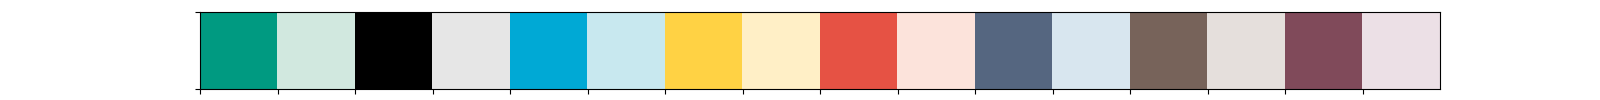

In [82]:
sns.palplot(palette)

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\vegar\\AppData\\Roaming',
 'CLICOLOR': '1',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'LAPTOP-LBFE7RGG',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'py35',
 'CONDA_EXE': 'C:\\Users\\vegar\\Anaconda3\\Scripts\\conda.exe',
 'CONDA_PREFIX': 'C:\\Users\\vegar\\Anaconda3\\envs\\py35',
 'CONDA_PREFIX_1': 'C:\\Users\\vegar\\Anaconda3',
 'CONDA_PROMPT_MODIFIER': '(py35) ',
 'CONDA_PYTHON_EXE': 'C:\\Users\\vegar\\Anaconda3\\python.exe',
 'CONDA_SHLVL': '2',
 'CONFIGSETROOT': 'C:\\WINDOWS\\ConfigSetRoot',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
 'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
 'GIT_PAGER': 'cat',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\vegar',
 'IPY_INTERRUPT